# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [3]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [4]:
# scrape the names of the items on the webpage above
import requests
resp = requests.get(url)

In [5]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(resp.content, "html.parser")
name_divs = soup.find_all('div', attrs={'class': 'product-name'})

In [6]:
names = []
for name_div in name_divs:
    name = name_div.find('h3')
    names.append(name.text)

In [7]:
# load the data into a dataframe file
import pandas as pd
df = pd.DataFrame(names)

In [8]:
# save the data as a csv file
df.to_csv('./data/part1.csv')

In [9]:
# display df.head()
df.head()

,0
0,Greenies Regular Dental Dog Treats
1,Greenies Teenie Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Authority® Dental & DHA Stick Puppy Treats Par...
4,Greenies Petite Dental Dog Treats


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [10]:
# load in the dataframe, notice it only contains columns salaries, NPS Score, eventOutcome
df = pd.read_csv('data/part2.csv')

In [11]:
def zscores(arr):
    """
    write a function that calculates 
    the zscores of a numpy arr, arr.
    """
    return [(x - arr.mean())/arr.std() for x in arr]

In [12]:
# calculate the zscore for each column and store them as a new column with the names used above
for column in df.columns:
    z_col = column+'_zscore'
    df[z_col] = zscores(df[column])

In [13]:
df.head()

,salaries,NPS Score,eventOutcome,salaries_zscore,NPS Score_zscore,eventOutcome_zscore
0,44112.0,-7.0,1,-1.460155,-0.913522,-1.103166
1,46777.0,-12.0,2,-0.793981,-1.080668,-0.668095
2,50013.0,50.0,5,0.014926,0.991947,0.637118
3,48983.0,-13.0,0,-0.242545,-1.114097,-1.538237
4,50751.0,-11.0,6,0.199405,-1.047239,1.072189


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

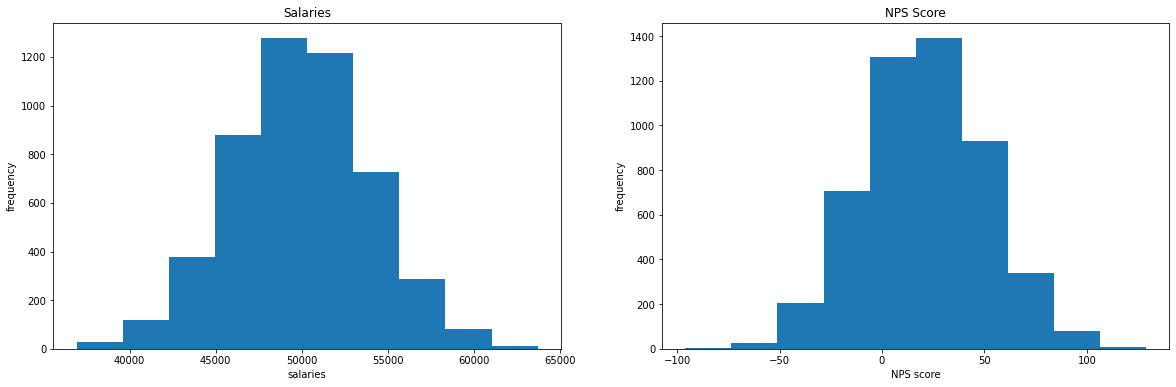

In [38]:
# plot for raw salaries and NPS Score data goes here
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(20)
fig.set
df['salaries'].hist(ax=ax1)
ax1.set(title = 'Salaries', xlabel='salaries', ylabel='frequency')
ax1.grid(False)
df['NPS Score'].hist(ax=ax2)
ax2.set(title = 'NPS Score', xlabel='NPS score', ylabel='frequency')
ax2.grid(False)

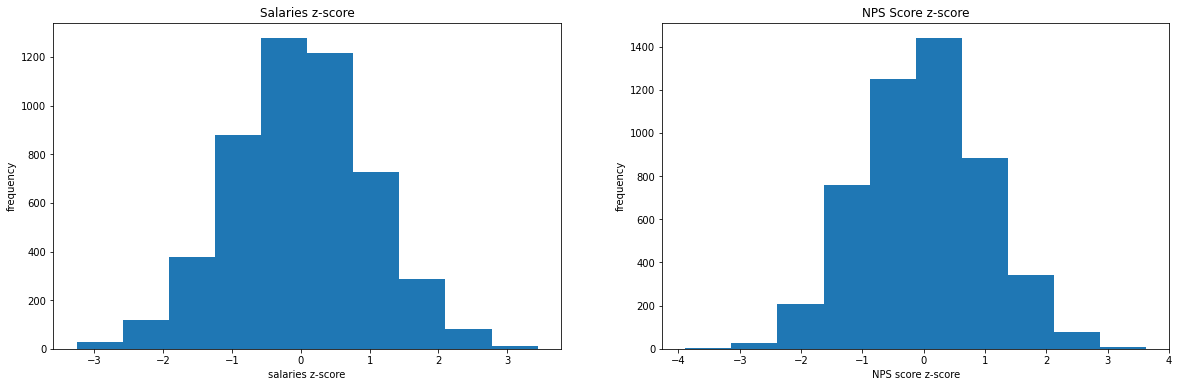

In [39]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(20)
fig.set
df['salaries_zscore'].hist(ax=ax1)
ax1.set(title = 'Salaries z-score', xlabel='salaries z-score', ylabel='frequency')
ax1.grid(False)
df['NPS Score_zscore'].hist(ax=ax2)
ax2.set(title = 'NPS Score z-score', xlabel='NPS score z-score', ylabel='frequency')
ax2.grid(False)

In [89]:
# plot for zscores for salaries and NPS Score data goes here

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [51]:
eventOutcomes = list(df['eventOutcome'])
pmf = dict()
N = len(eventOutcomes)
for outcome in eventOutcomes:
    pmf[outcome] = pdf.get(outcome,0) + 1/N

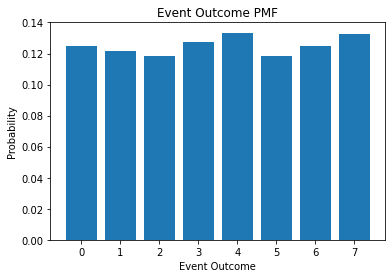

In [58]:
fig = plt.figure(figsize=(6,4));
plt.bar(pmf.keys(), pmf.values());
plt.title('Event Outcome PMF');
plt.xlabel('Event Outcome');
plt.ylabel('Probability');

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

In [60]:
cdf = dict()
for j in range(len(pmf)):
    for k in range(j):
        cdf[j] = cdf.get(j,0) + pdf[j]

Text(0, 0.5, '$P(E \\leq N)$')

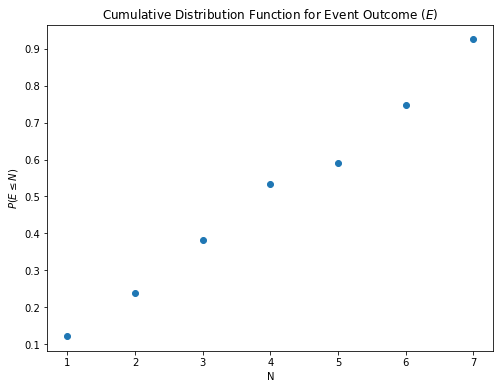

In [78]:
fig = plt.figure(figsize=(8,6))
plt.scatter(cdf.keys(), cdf.values())
plt.title('Cumulative Distribution Function for Event Outcome ($E$)')
plt.xlabel(r'N')
plt.ylabel(r'$P(E \leq N)$')

# Level Up:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

* plot the pdf and cdf of a given distribution

In [10]:
# find salaries with zscores <= 2.0 


In [11]:
# calculate skewness and kurtosis of NPS Score column

# Plotting a pdf and cdf of a normal distribution
A survey is taken that finds that students send an mean average of 80 DMs a day with a standard deviation of 6 DMS. 

In [13]:
# plot the pdf and cdf of this normal distribution. level up if you can do it in subplots

In [14]:
# what is the probability of drawing a student that sends at least 82 DMs a day?

A second survey is taken at another bootcamp that shows that students send a mean average of
80 DMs a day, but they have a standard deviation of 9 DMS.  

In [15]:
# What is the difference in the probability of finding a student that sends, at most, 65 DMs a day? 

# run the cell below to convert your notebook to a README for assessment

In [ ]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md